<a href="https://colab.research.google.com/github/ngoan22mse23088/python4engineers-assignments/blob/master/Assignments1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install mysql-server mysql-client -y
!service mysql start
!mysql -u root -p -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root';"
!mysql -u root -p -e "SELECT * FROM mydatabase.cost_revenue_dirty;"
!mysql -u root -p -e "DROP TABLE mydatabase.cost_revenue_dirty;"
!pip install mysql-connector-python
!pip install pandas matplotlib

In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv
df = pd.read_csv('https://raw.githubusercontent.com/ngoan22mse23088/python4engineers-assignments/master/cost_revenue_dirty.csv')

# Kết nối tới MySQL (port mặc định 3306)
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="mydatabase"
)

# Tạo bảng và insert dữ liệu
mycursor = mydb.cursor()
mycursor.execute("CREATE TABLE IF NOT EXISTS cost_revenue_dirty (id INT AUTO_INCREMENT PRIMARY KEY, movie_rank INT, release_date VARCHAR(255), movie_title VARCHAR(255), production_budget VARCHAR(255), worldwide_gross VARCHAR(255), domestic_gross VARCHAR(255))")
for index, row in df.iterrows():
    movie_rank = row['Rank']
    release_date = row['Release Date']
    movie_title = row['Movie Title']
    production_budget = row['Production Budget ($)']
    worldwide_gross = row['Worldwide Gross ($)']
    domestic_gross = row['Domestic Gross ($)']
    sql = "INSERT INTO cost_revenue_dirty (movie_rank, release_date, movie_title, production_budget, worldwide_gross, domestic_gross) VALUES (%s, %s, %s, %s, %s, %s)"
    val = (movie_rank, release_date, movie_title, production_budget, worldwide_gross, domestic_gross)
    mycursor.execute(sql, val)
mydb.commit()
print(mycursor.rowcount, "records inserted.")



<ipython-input-87-70336f7f6480>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['worldwide_gross'] = df['worldwide_gross'].str.replace("$", "").str.replace(",", "").astype(int)


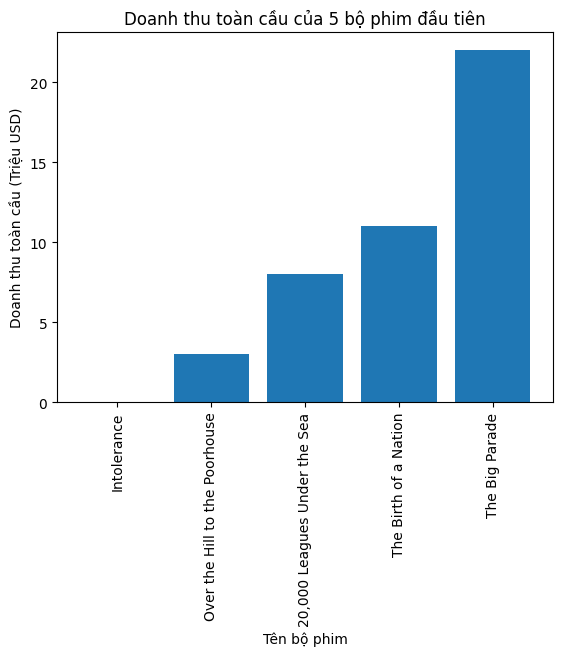

In [ ]:
# Truy vấn dữ liệu từ MySQL
mycursor.execute("SELECT * FROM cost_revenue_dirty LIMIT 5")
result = mycursor.fetchall()

# Đưa dữ liệu vào DataFrame
df = pd.DataFrame(result, columns=['id', 'movie_rank', 'release_date', 'movie_title', 'production_budget', 'worldwide_gross', 'domestic_gross'])

# Xử lý dữ liệu
# Loại bỏ các bản ghi có giá trị nan 
df.dropna(subset=['worldwide_gross', 'production_budget', 'domestic_gross'], inplace=True)
# Chuyển sang giá trị int để sắp xếp 
df['worldwide_gross'] = df['worldwide_gross'].str.replace("$", "").str.replace(",", "").astype(int)
# Chuyển sang đơn vị triệu usd đẻ hiển thị chi tiết hơn
df['worldwide_gross'] = df['worldwide_gross'] /1000000
# Sắp xếp giá trị theo cột doanh thu toàn cầu
df = df.sort_values(by=['worldwide_gross'])

# Trực quan hóa
plt.bar(df['movie_title'], df['worldwide_gross'])
plt.xticks(rotation=90)
plt.xlabel('Tên bộ phim')
plt.ylabel('Doanh thu toàn cầu (Triệu USD)')
plt.title('Doanh thu toàn cầu của 5 bộ phim đầu tiên')
plt.show()